In [6]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
import numpy as np
import matplotlib.pyplot as plt
from src.plot_settings import (
    ps_defaults,
    label_subplots,
    get_dim,
    set_dim,
    PALETTE,
    STD_CLR_LIST,
    CAM_BLUE,
    BRICK_RED,
    OX_BLUE,
)
ps_defaults(use_tex=True, dpi=300)

In [122]:
from src.read_in_data import get_s, get_outputs, tdsts
import xarray as xr

In [53]:
sout_ds = get_s(name="s.out")
sin_ds = get_s(name="s.in")

1.3.1


In [126]:
tdsts()

ucon
vcon
wcon
pcon
tfcon
qcon
tescon
tecon
liqcon
ucon
vcon
wcon
pcon
tfcon
qcon
tescon
tecon
liqcon
ucon
vcon
wcon
pcon
tfcon
qcon
tescon
tecon
liqcon
ucon
vcon
wcon
pcon
tfcon
qcon
tescon
tecon
liqcon
ucon
vcon
wcon
pcon
tfcon
qcon
tescon
tecon
liqcon
ucon
vcon
wcon
pcon
tfcon
qcon
tescon
tecon
liqcon
ucon
vcon
wcon
pcon
tfcon
qcon
tescon
tecon
liqcon
ucon
vcon
wcon
pcon
tfcon
qcon
tescon
tecon
liqcon
ucon
vcon
wcon
pcon
tfcon
qcon
tescon
tecon
liqcon


(<xarray.Dataset>
 Dimensions:  (T: 9, x: 266, y: 64)
 Dimensions without coordinates: T, x, y
 Data variables:
     ucon     (T, y, x) float32 0.02344 0.05 -0.02 -0.11 ... -0.03 -0.01 0.12
     vcon     (T, y, x) float32 1.286 1.7 3.49 4.11 ... -4.49 -4.62 -4.32 -4.39
     wcon     (T, y, x) float32 -0.003949 -0.0 0.01 0.0 ... -0.0 -0.0 -0.0 0.0
     tfcon    (T, y, x) float32 295.5 295.8 295.9 295.8 ... 189.6 189.5 189.5
     tescon   (T, y, x) float32 343.6 344.7 345.1 344.8 ... 438.9 438.7 438.7
     tecon    (T, y, x) float32 335.6 338.0 340.1 342.0 ... 438.9 438.7 438.6
     liqcon   (T, y, x) float32 0.002715 0.0 0.02 0.01 0.02 ... 0.0 0.0 0.0 0.0,
 <xarray.Dataset>
 Dimensions:  (T: 9, x: 266, y: 64)
 Dimensions without coordinates: T, x, y
 Data variables:
     ucon     (T, y, x) float32 0.02344 0.05 -0.02 -0.11 ... -0.03 -0.01 0.12
     vcon     (T, y, x) float32 1.286 1.7 3.49 4.11 ... -4.49 -4.62 -4.32 -4.39
     wcon     (T, y, x) float32 -0.003949 -0.0 0.01 0.0 ... -0.0 -

In [60]:
d1, d2 = get_outputs()

/Users/simon/rotunno87/src/read_in_data.py:75: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [90]:
sout_ds.p

<xarray.DataArray 'p' (p: 63)>
array([959.9094, 925.7659, 892.6665, 860.5846, 829.4955, 799.3669, 770.1731,
       741.8951, 714.512 , 687.9977, 662.326 , 637.4645, 613.3868, 590.0773,
       567.5122, 545.6647, 524.5123, 504.0366, 484.223 , 465.0489, 446.4903,
       428.525 , 411.1396, 394.313 , 378.0243, 362.2629, 347.0103, 332.2517,
       317.9734, 304.1605, 290.7993, 277.8779, 265.3874, 253.3161, 241.6516,
       230.3837, 219.5022, 208.997 , 198.8597, 189.0814, 179.6537, 170.5689,
       161.8207, 153.4113, 145.3415, 137.6111, 130.247 , 123.2534, 116.5783,
       110.24  , 104.2317,  98.5662,  93.2148,  88.128 ,  83.3212,  78.7756,
        74.478 ,  70.4144,  66.5717,  62.9372,  59.5031,  56.2594,  53.1939],
      dtype=float32)
Coordinates:
  * p        (p) float32 959.9 925.8 892.7 860.6 ... 62.94 59.5 56.26 53.19
Attributes:
    units:    hPa

In [91]:
sin_ds.p

<xarray.DataArray 'p' (p: 46)>
array([1000.,  975.,  950.,  925.,  900.,  875.,  850.,  825.,  800.,  775.,
        750.,  725.,  700.,  675.,  650.,  625.,  600.,  575.,  550.,  525.,
        500.,  475.,  450.,  425.,  400.,  375.,  350.,  325.,  300.,  275.,
        250.,  225.,  200.,  175.,  150.,  125.,  100.,   80.,   60.,   40.,
         30.,   25.,   20.,   15.,   10.,    5.], dtype=float32)
Coordinates:
  * p        (p) float32 1e+03 975.0 950.0 925.0 900.0 ... 20.0 15.0 10.0 5.0
Attributes:
    units:    hPa

In [115]:
def make_datasets():
    da_out = []
    da_out2 = []
    for key in d2:
        print(key)
        ds = xr.Dataset(
            data_vars={
                key: (["y", "x"], d2[key].astype("float32")),
            },
        )
        ds[key].attrs["long_name"] =  key
        def get_range(npa):
            return min(npa), max(npa)

        if np.all((0, 265) == get_range(ds[key]["x"].values)):
            da_out.append(ds[key])
        else:
            da_out2.append(ds[key].rename({"x":"y", "y": "x"}))
    ds = xr.merge(da_out)
    ds2 = xr.merge(da_out2)
    return ds, ds2
# ds.assign_coords({"p": ("y", sout_ds.p.values.tolist().append(50))})
ds, ds2 = make_datasets()

ucon
vcon
wcon
pcon
tfcon
qcon
tescon
tecon
liqcon


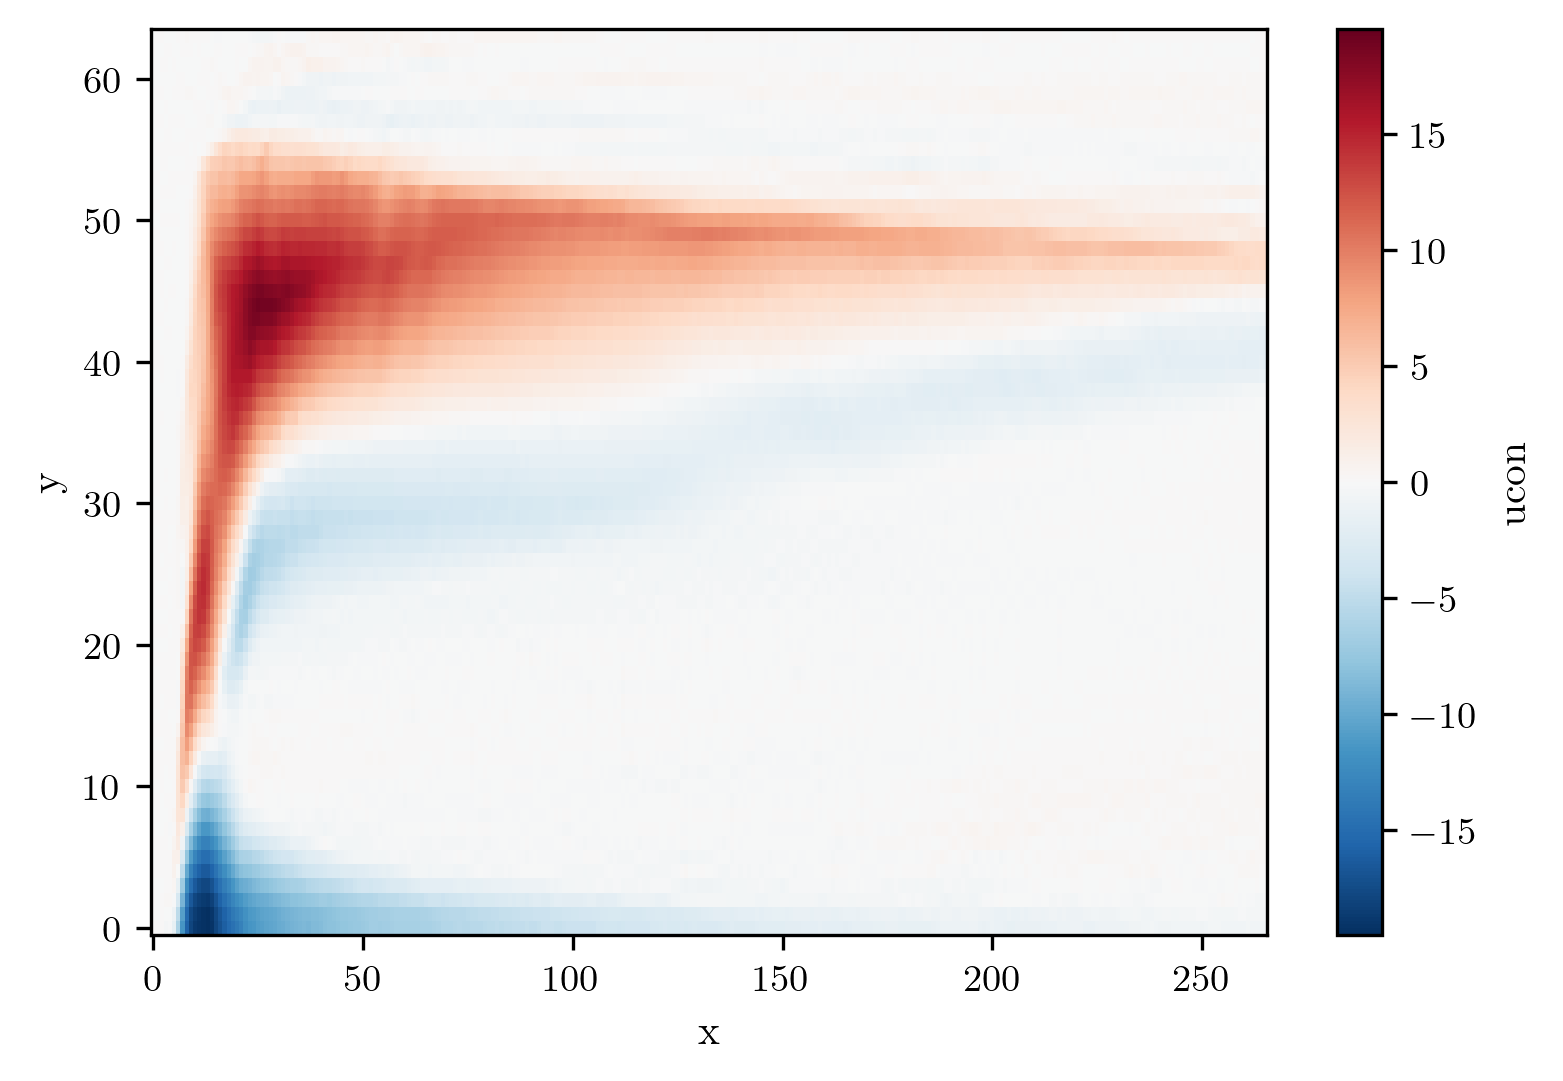

In [119]:
ds.ucon.plot()

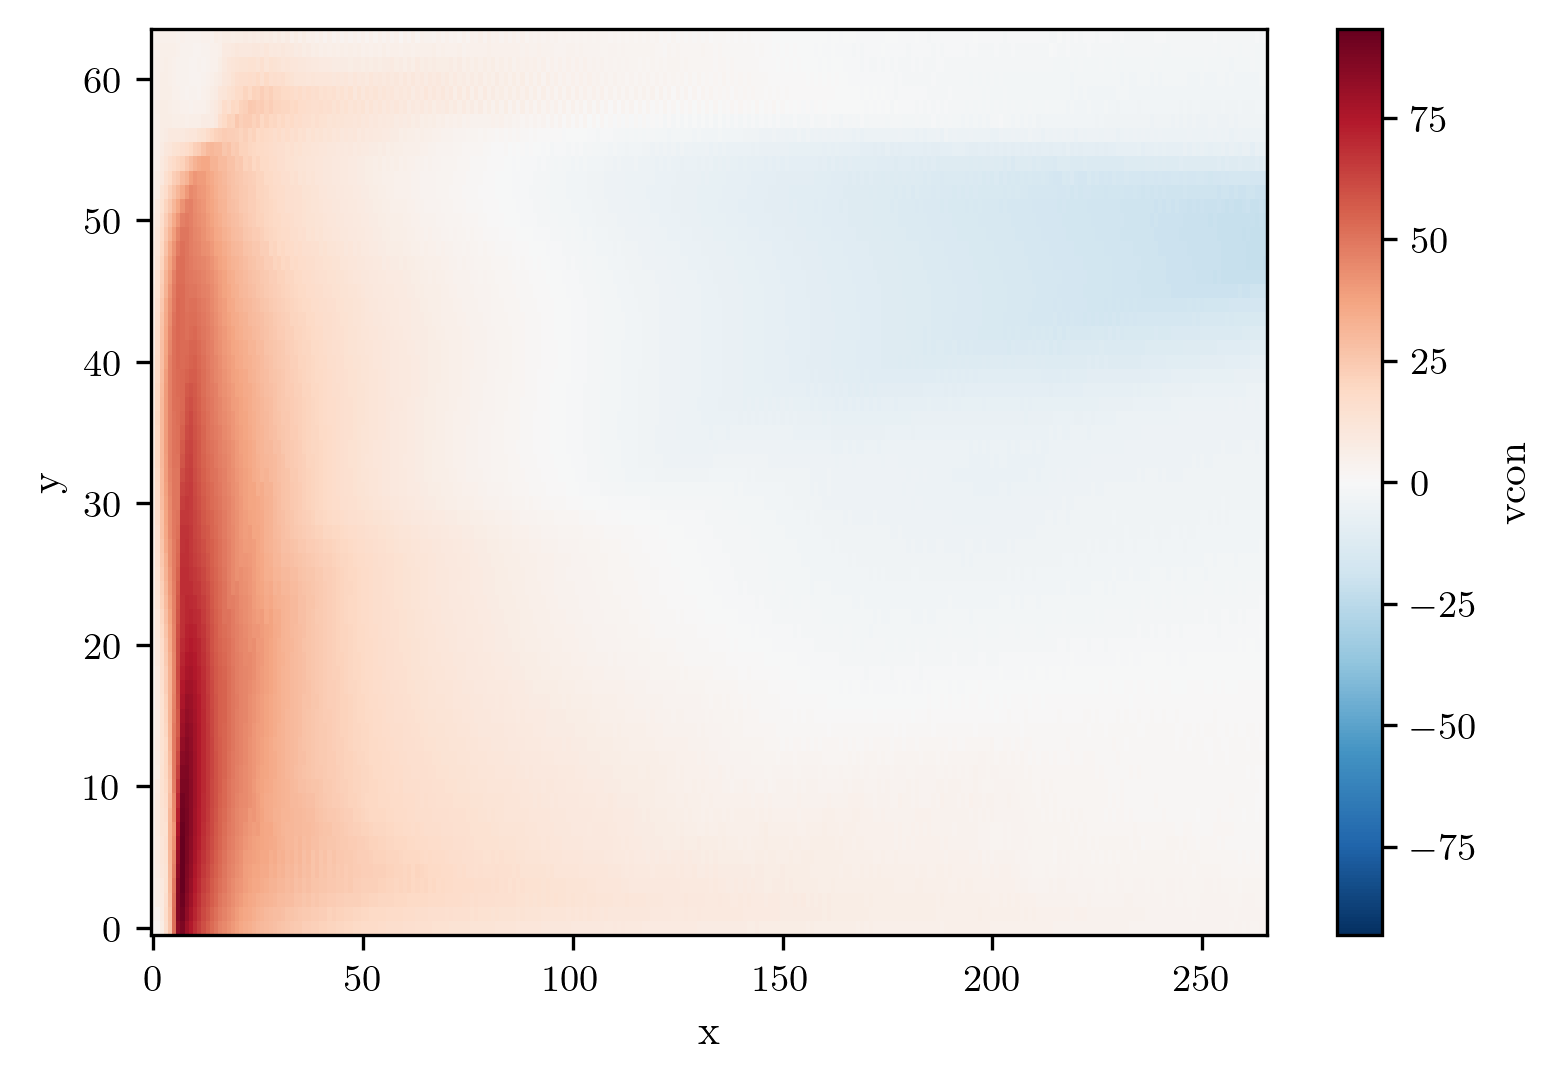

In [121]:
ds.vcon.plot()

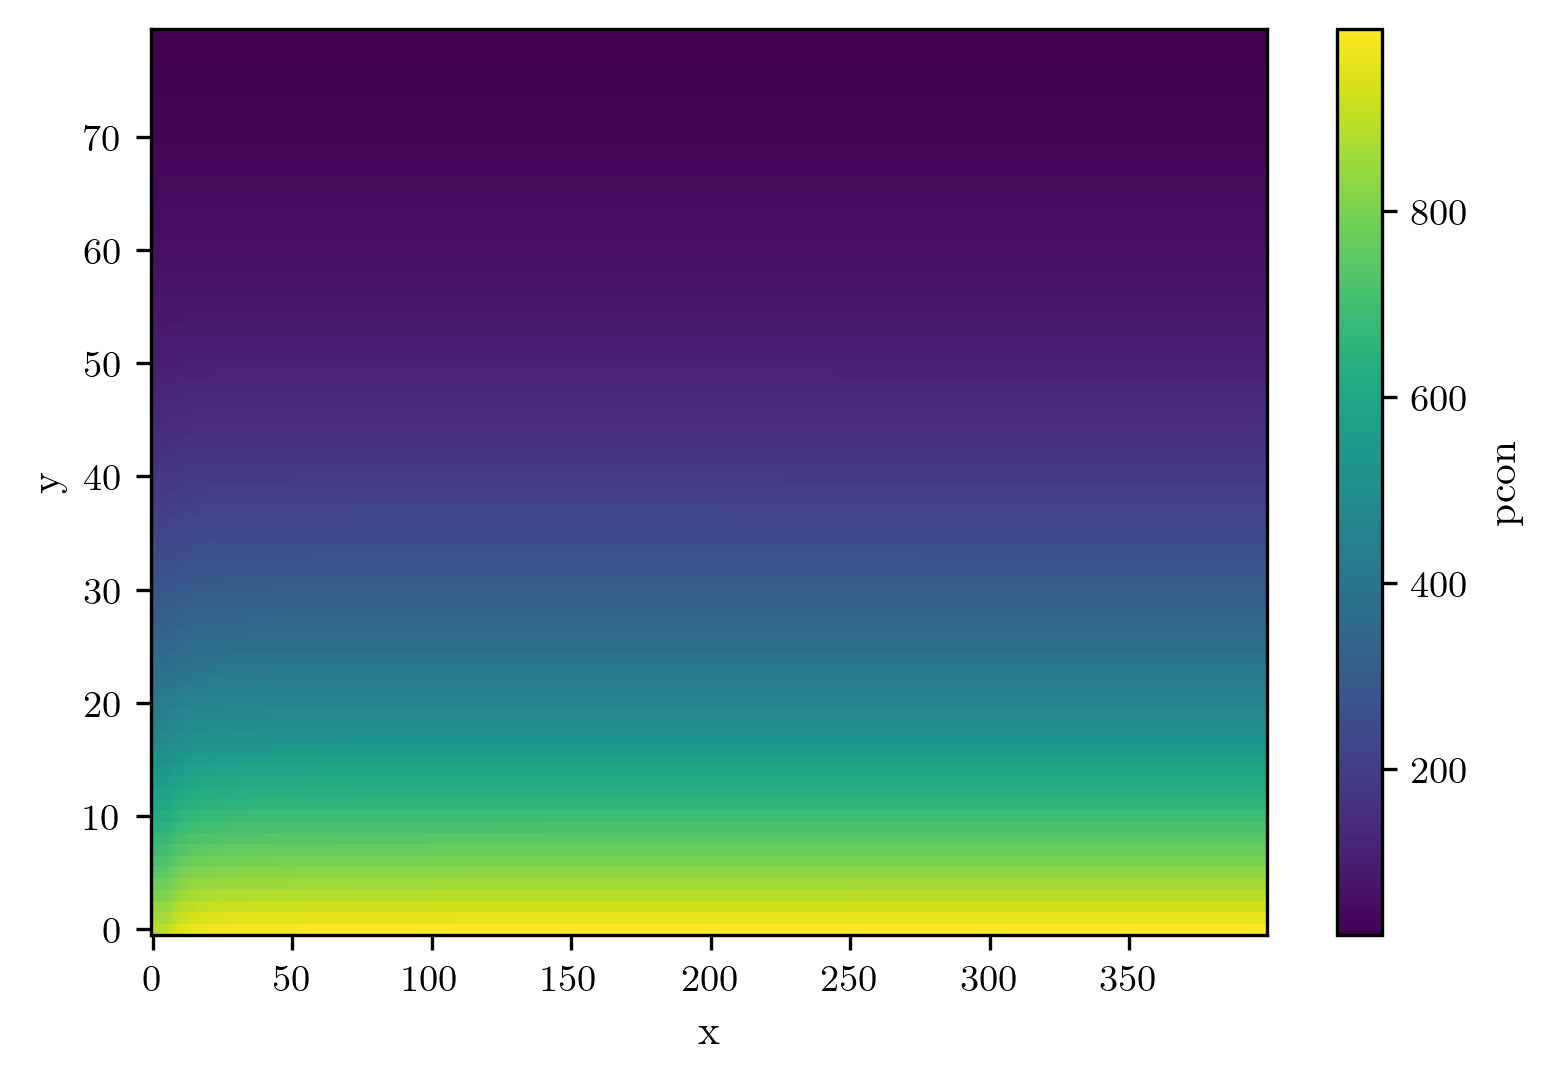

In [113]:
ds2.pcon.plot(x="x", y="y")

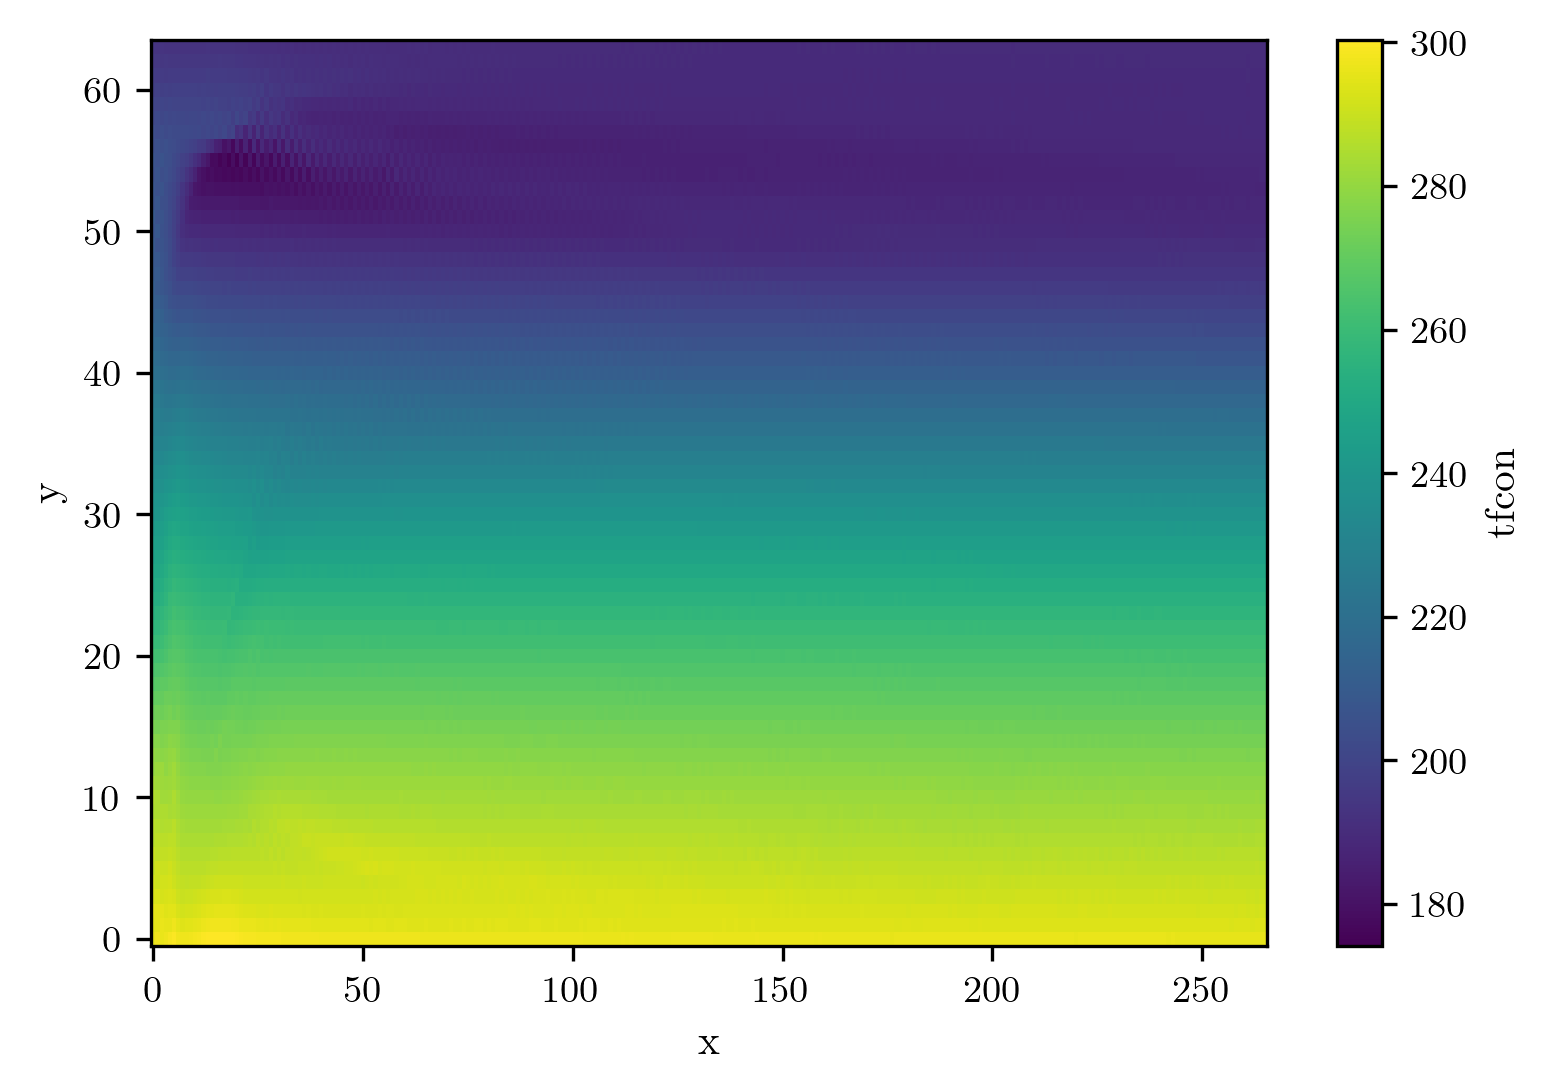

In [114]:
ds.tfcon.plot()

In [84]:
np.all((0, 265) == get_range(ds[key]["y"].values))

True

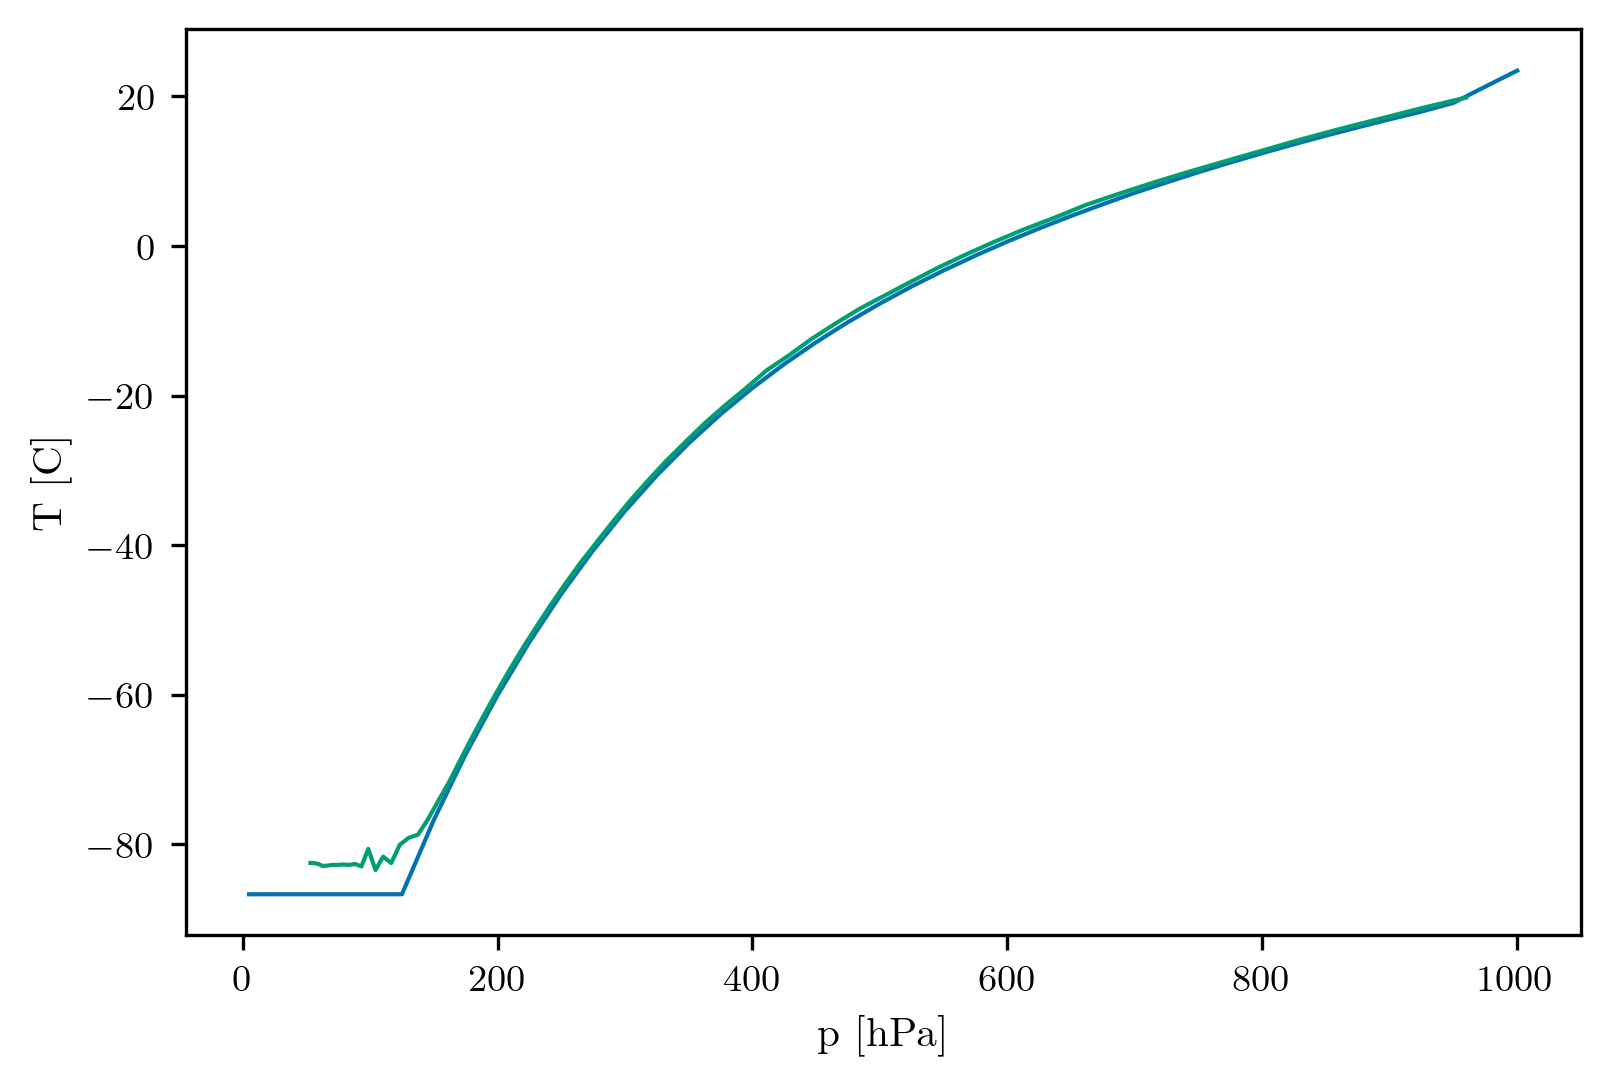

In [56]:
sin_ds.T.plot()
sout_ds.T.plot()

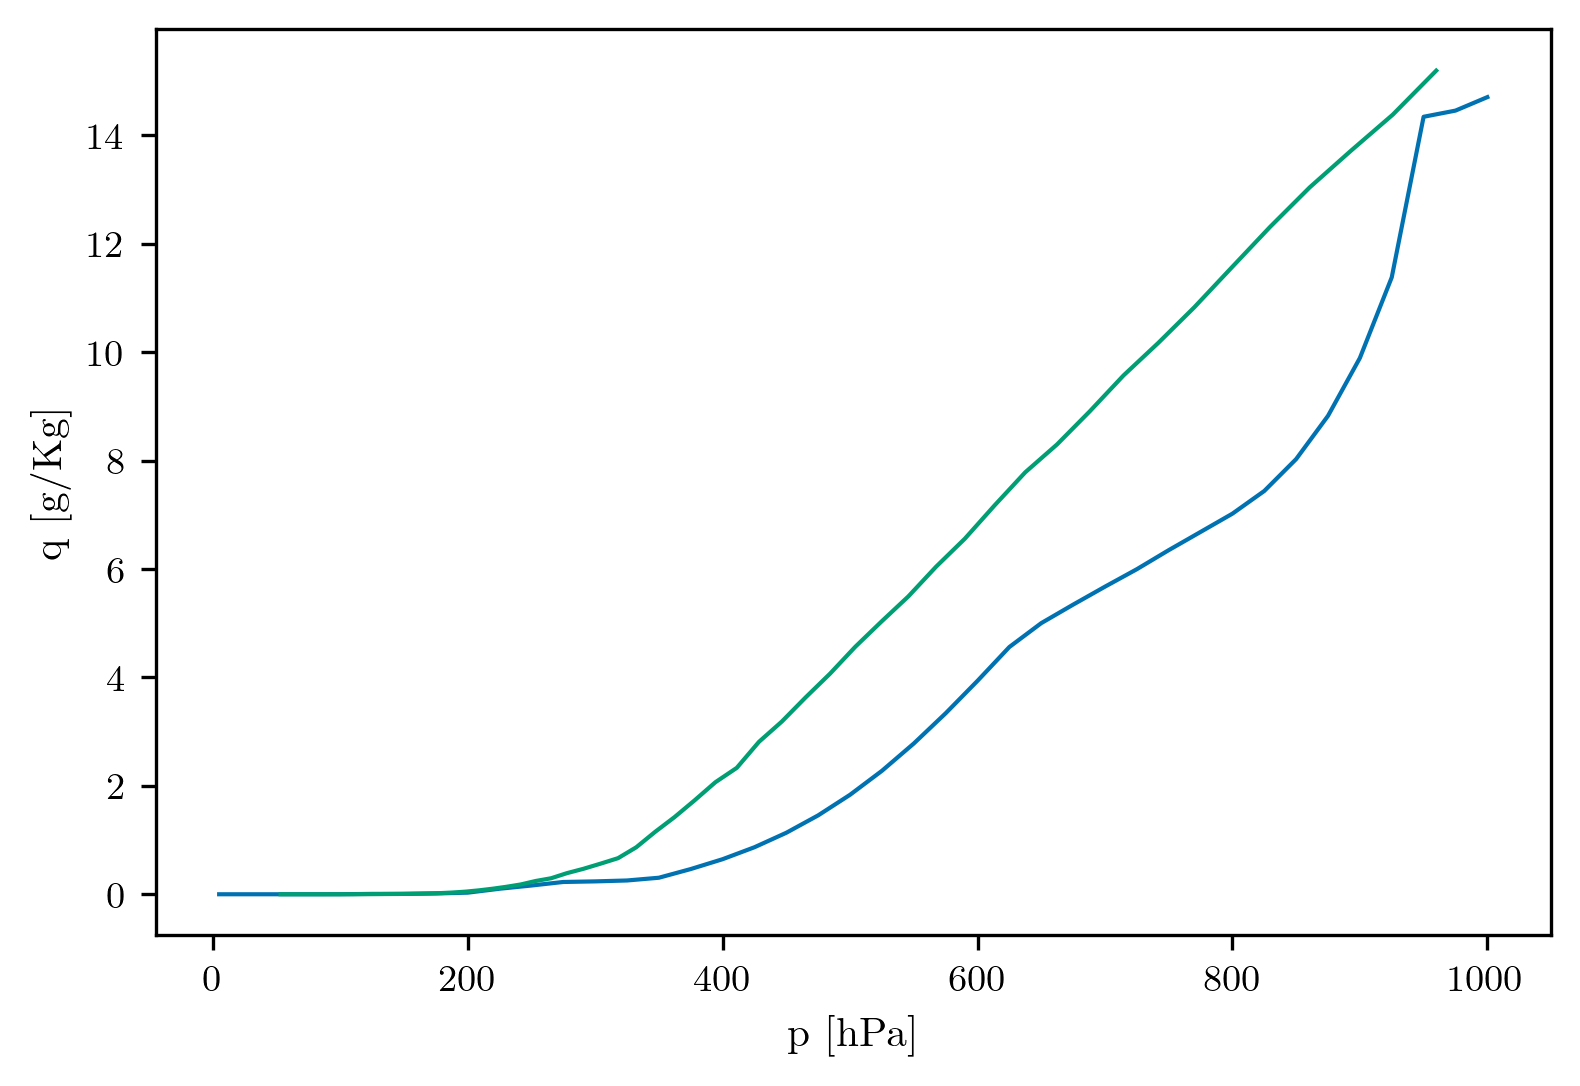

In [57]:
sin_ds.q.plot()
sout_ds.q.plot()

In [20]:
sin_npa[:, 1]

array(['23.451', '21.315', '19.140', '17.972', '16.941', '15.872',
       '14.763', '13.612', '12.415', '11.169', '9.868', '8.508', '7.114',
       '5.588', '4.014', '2.353', '0.594', '-1.277', '-3.272', '-5.408',
       '-7.702', '-10.178', '-12.863', '-15.787', '-18.987', '-22.504',
       '-26.384', '-30.677', '-35.433', '-40.700', '-46.529', '-52.967',
       '-60.080', '-67.961', '-76.761', '-86.696', '-86.696', '-86.696',
       '-86.696', '-86.696', '-86.696', '-86.696', '-86.696', '-86.696',
       '-86.696', '-86.696'], dtype='<U9')

In [ ]:
xr = xr.Datarray()

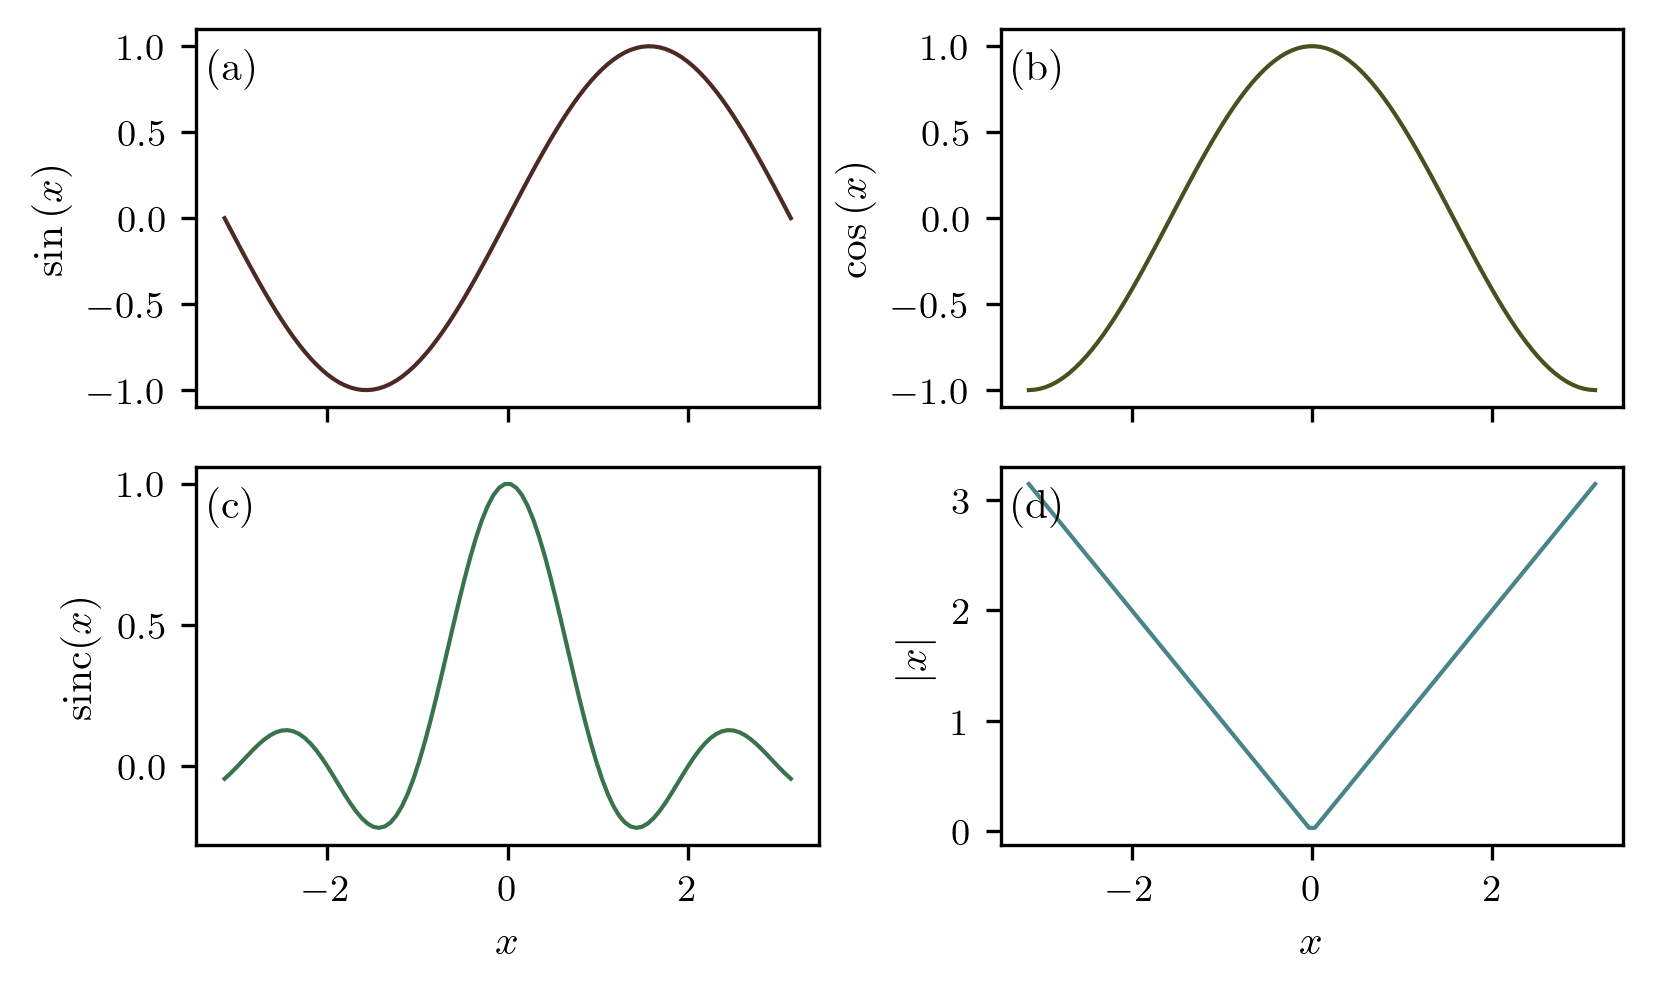

In [13]:
fig, axs = plt.subplots(2, 2, sharex=True)

x = np.linspace(-np.pi, np.pi, num=100)
axs[0, 0].plot(x, np.sin(x), color=STD_CLR_LIST[0])
axs[0, 1].plot(x, np.cos(x), color=STD_CLR_LIST[1])
axs[1, 0].plot(x, np.sinc(x), color=STD_CLR_LIST[2])
axs[1, 1].plot(x, np.abs(x), color=STD_CLR_LIST[3])

axs[0, 0].set_ylabel(r"$\sin{(x)}$")
axs[0, 1].set_ylabel(r"$\cos{(x)}$")
axs[1, 0].set_ylabel(r"$\mathrm{sinc}{(x)}$")
axs[1, 1].set_ylabel(r"$|x|$")
axs[1, 1].set_xlabel(r"$x$")
axs[1, 0].set_xlabel(r"$x$")


set_dim(fig, fraction_of_line_width=1, ratio=(5 ** 0.5 - 1) / 2)
label_subplots(axs, start_from=0, fontsize=10)
plt.tight_layout()
plt.show()

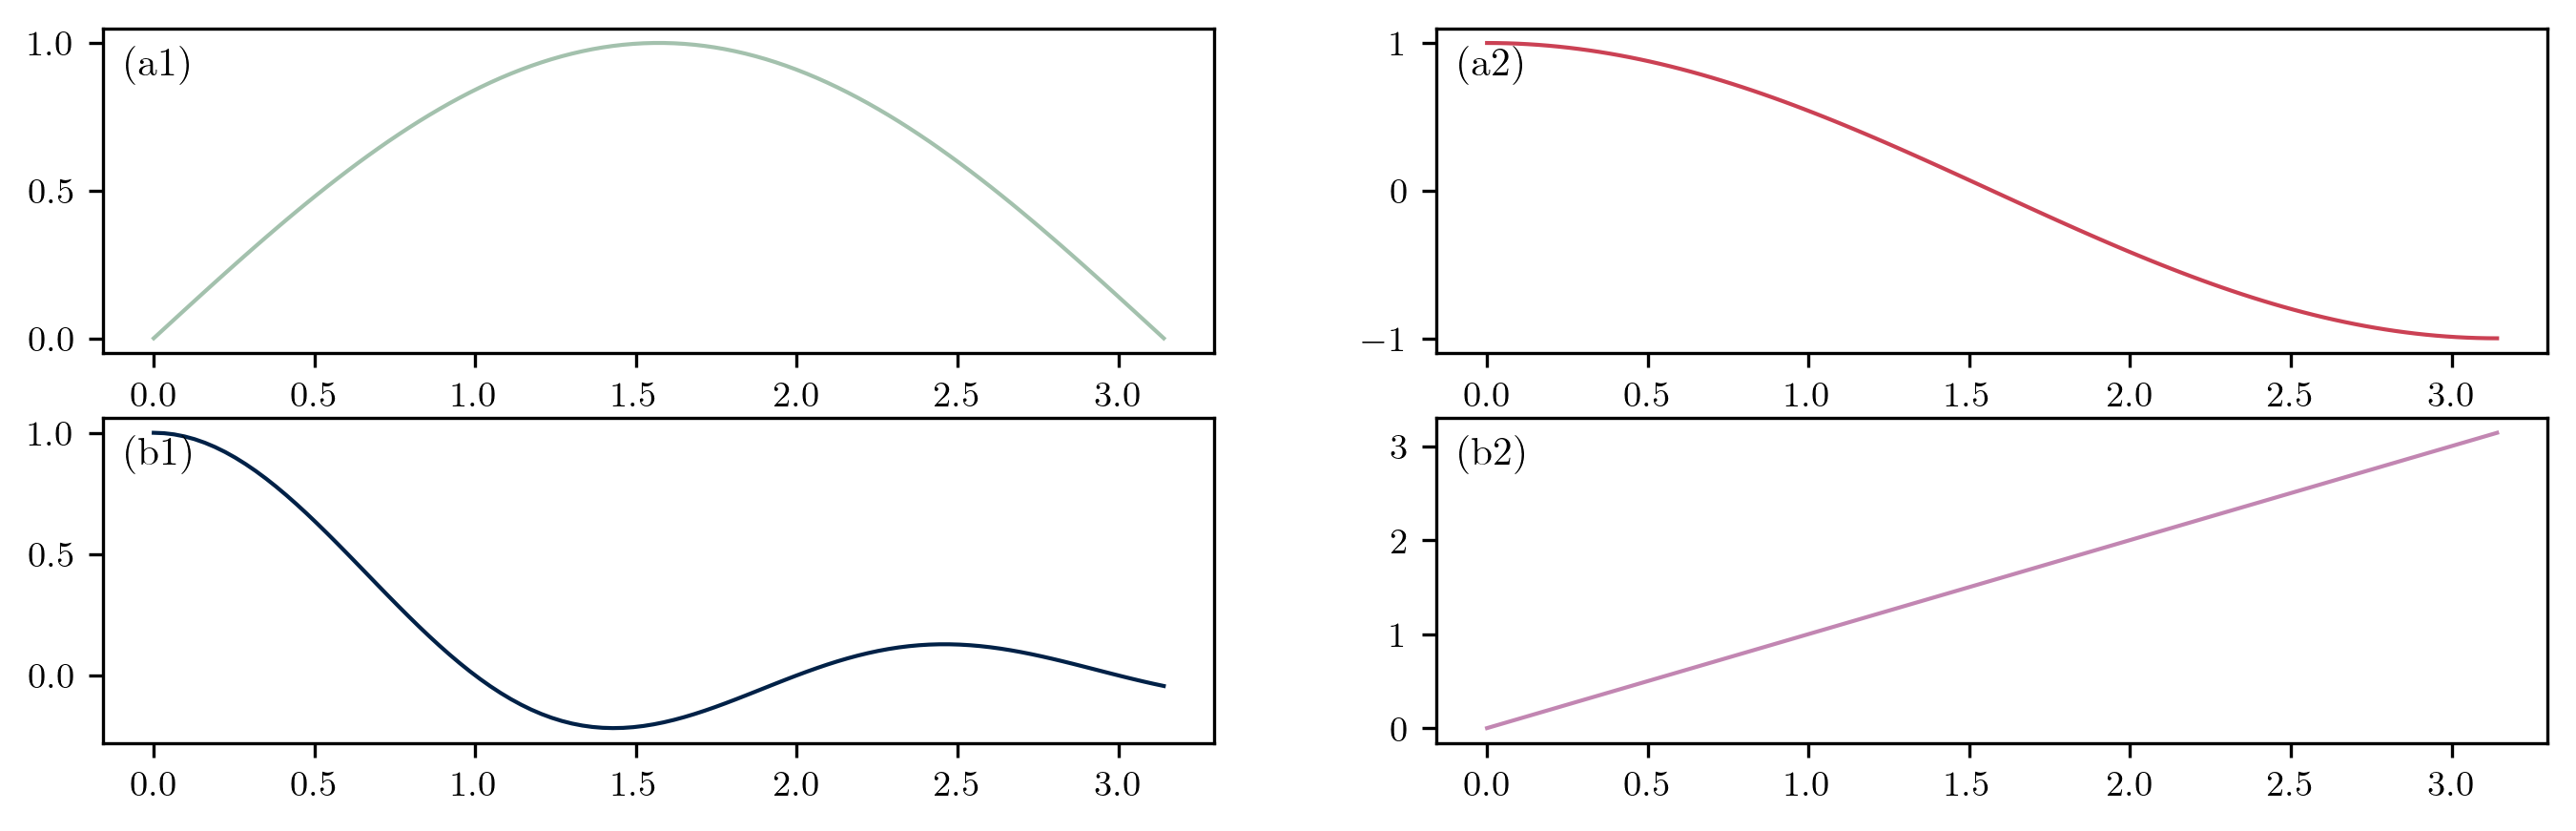

In [11]:
fig, axs = plt.subplots(2, 2)

x = np.linspace(0, np.pi, num=100)
axs[0, 0].plot(x, np.sin(x), color=CAM_BLUE)
axs[0, 1].plot(x, np.cos(x), color=BRICK_RED)
axs[1, 0].plot(x, np.sinc(x), color=OX_BLUE)
axs[1, 1].plot(x, np.abs(x), color=STD_CLR_LIST[5])

set_dim(fig, fraction_of_line_width=2, ratio=0.3)

label_subplots(axs, labels=["a1", "a2", "b1", "b2"], start_from=0, fontsize=10)
plt.show()

In [5]:
ps_defaults(use_tex=False)

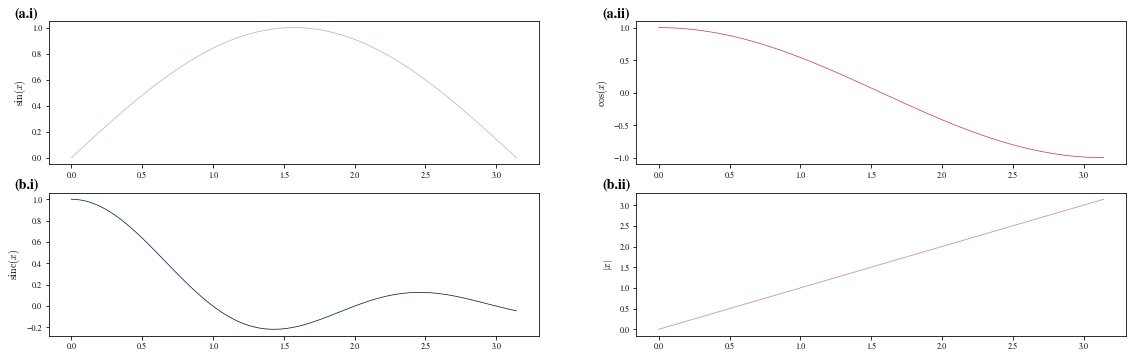

In [9]:
fig, axs = plt.subplots(2, 2)

x = np.linspace(0, np.pi, num=100)
axs[0, 0].plot(x, np.sin(x), color=CAM_BLUE)
axs[0, 1].plot(x, np.cos(x), color=BRICK_RED)
axs[1, 0].plot(x, np.sinc(x), color=OX_BLUE)
axs[1, 1].plot(x, np.abs(x), color=STD_CLR_LIST[5])

axs[0, 0].set_ylabel(r"$\sin{(x)}$")
axs[0, 1].set_ylabel(r"$\cos{(x)}$")
axs[1, 0].set_ylabel(r"$\mathrm{sinc}{(x)}$")
axs[1, 1].set_ylabel(r"$|x|$")

set_dim(fig, fraction_of_line_width=2, ratio=0.3)

label_subplots(
    axs, labels=["a.i", "a.ii", "b.i", "b.ii"], 
    start_from=0, x_pos=-0.07, y_pos=1.1, fontsize=14
)